# Feature Reduction
------------------------------------------------

### Load the Dataset
Read data from pickle files.

In [1]:
import pandas as pd
import numpy as np
import os

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATA_DIR  = os.path.join(os.path.abspath(".."), "data")
IMAGE_DIR = os.path.join(os.path.abspath(".."), "images")

In [3]:
X_train = pd.read_pickle(os.path.join(DATA_DIR, 'processed', 'train/train_features.pkl'))
X_val = pd.read_pickle(os.path.join(DATA_DIR, 'processed', 'val/val_features.pkl'))
X_test = pd.read_pickle(os.path.join(DATA_DIR, 'processed', 'test/test_features.pkl'))

y_train = pd.read_pickle(os.path.join(DATA_DIR, 'processed', 'train/train_labels.pkl'))
y_val = pd.read_pickle(os.path.join(DATA_DIR, 'processed', 'val/val_labels.pkl'))
y_test = pd.read_pickle(os.path.join(DATA_DIR, 'processed', 'test/test_labels.pkl'))

### PCA 
Note that after dimensionality reduction, there usually isn’t a particular meaning assigned to each principal component. The new components are just the two main dimensions of variation.

In [4]:
from sklearn.decomposition import PCA

In [5]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(X_train)

principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])

### Visualize 2D Projection
PCA projection to 2D to visualize the entire data set. 

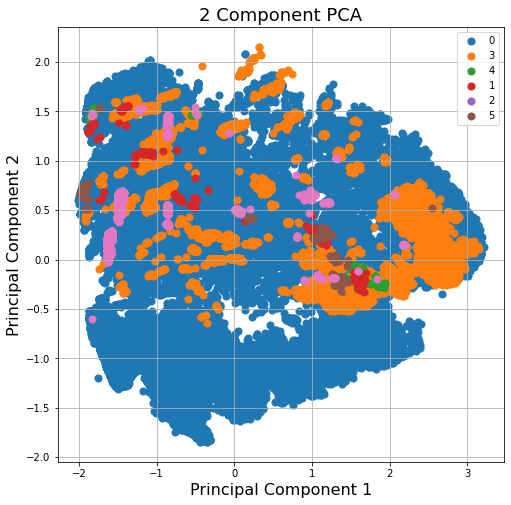

In [6]:
finalDf = pd.concat([principalDf, y_train], axis=1)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8));
targets = y_train['label'].unique()

for target in [0, 3, 5, 2, 6, 1, 4]:
    filt = finalDf['label'] == target
    ax.scatter(finalDf.loc[filt, 'principal component 1'], finalDf.loc[filt, 'principal component 2'], s=50)

ax.set_xlabel('Principal Component 1', fontsize=16)
ax.set_ylabel('Principal Component 2', fontsize=16)
ax.set_title('2 Component PCA', fontsize=18)
ax.legend(targets)
ax.grid()

### Explained Variance
The explained variance tells us how much information (variance) can be attributed to each of the principal components.

In [7]:
pca.explained_variance_ratio_

array([0.46551385, 0.16114407])

In [8]:
sum(pca.explained_variance_ratio_)

0.6266579211319943

Together, the two principal components contain about 63% of the information. The first principal component contains about 47% of the variance. The second principal component contains about 16% of the variance. 

### Relationship between Cumulative Explained Variance and Number of Principal Components

In [9]:
import seaborn as sns

sns.set_theme(style="white", color_codes=True)

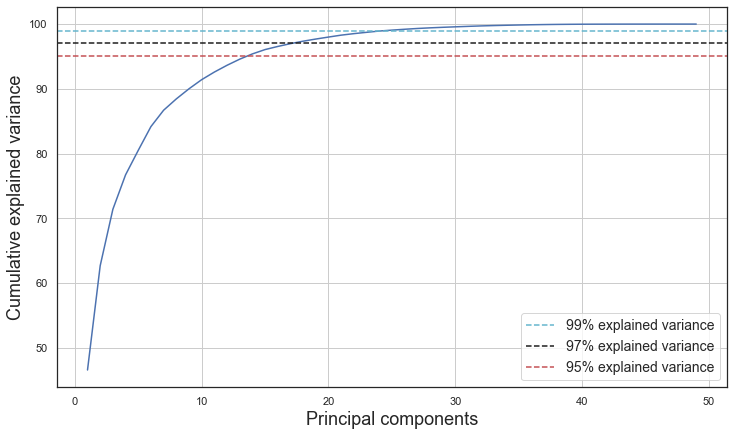

In [10]:
pca = PCA()

pca.fit(X_train)

tot = sum(pca.explained_variance_)

var_exp = [(i/tot)*100 for i in sorted(pca.explained_variance_, reverse=True)] 

cum_var_exp = np.cumsum(var_exp)

fig, ax = plt.subplots(figsize=(12, 7));
plt.plot(range(1, 50), cum_var_exp)
#plt.title('Explained Variance by Components', fontsize=18)
plt.ylabel('Cumulative explained variance', fontsize = 18)
plt.xlabel('Principal components', fontsize = 18)
ax.axhline(y=99, color='c', linestyle='--', label='99% explained variance')
ax.axhline(y=97, color='k', linestyle='--', label='97% explained variance')
ax.axhline(y=95, color='r', linestyle='--', label='95% explained variance')
ax.legend(loc='best', markerscale=1.0, fontsize=14)
ax.grid()
fig.savefig(os.path.join(IMAGE_DIR, 'pca.pdf'))

### The minimum number of principal components such that 99% of the variance is retained

In [11]:
pca = PCA(0.99)

X_train_pca = pd.DataFrame(pca.fit_transform(X_train))
X_val_pca = pd.DataFrame(pca.transform(X_val))
X_test_pca = pd.DataFrame(pca.transform(X_test))

In [12]:
sum(pca.explained_variance_ratio_)

0.9906508850779933

In [13]:
len(pca.explained_variance_)

25

99% of the variance is retained for 25 principal components instead of 47.

In [14]:
X_train_pca.to_pickle(os.path.join(DATA_DIR, 'processed', 'train/train_features_pca25.pkl'))
X_val_pca.to_pickle(os.path.join(DATA_DIR, 'processed', 'val/val_features_pca25.pkl'))
X_test_pca.to_pickle(os.path.join(DATA_DIR, 'processed', 'test/test_features_pca25.pkl'))